In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [3]:
#!pip install xgboost

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               752 non-null    int64 
 1   Sex               752 non-null    object
 2   Job               752 non-null    int64 
 3   Housing           752 non-null    object
 4   Saving.accounts   752 non-null    object
 5   Checking.account  752 non-null    object
 6   Duration          752 non-null    int64 
 7   Purpose           752 non-null    object
 8   Credit.amount     752 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 53.0+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               248 non-null    int64 
 1   Sex               248 non-null    object
 2   Job               248 non-null    int64 
 3   Housing           248 non-null    object
 4   Saving.accounts   248 non-null    object
 5   Checking.account  248 non-null    object
 6   Duration          248 non-null    int64 
 7   Purpose           248 non-null    object
 8   Credit.amount     248 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 17.6+ KB


In [7]:
train['Housing'].replace(['free', 'rent','own'],[0, 1, 2], inplace=True)
train['Sex'].replace(['female', 'male'],[0, 1], inplace=True)
train['Purpose'].replace(['radio/TV', 'education',"furniture/equipment","car",
                        'business', 'domestic appliances','repairs',
                        'vacation/others'],[1,2,3,4,5,6,7,8], inplace=True)
train['Saving.accounts'].replace(['little', 'moderate','quite rich', 'rich'],[1,2,3,4],inplace = True)
train['Checking.account'].replace(['little', 'moderate', 'rich'],[1,2,3],inplace = True)

In [8]:
test['Housing'].replace(['free', 'rent','own'],[0, 1, 2], inplace=True)
test['Sex'].replace(['female', 'male'],[0, 1], inplace=True)
test['Purpose'].replace(['radio/TV', 'education',"furniture/equipment","car",
                        'business', 'domestic appliances','repairs',
                        'vacation/others'],[1,2,3,4,5,6,7,8], inplace=True)
test['Saving.accounts'].replace(['little', 'moderate','quite rich', 'rich'],[1,2,3,4],inplace = True)
test['Checking.account'].replace(['little', 'moderate', 'rich'],[1,2,3],inplace = True)

In [9]:
X_train = train.drop("Credit.amount",axis=1)
X_test = test.drop("Credit.amount",axis=1)
y_train = train["Credit.amount"]
y_test = test["Credit.amount"]

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=120,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              9000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

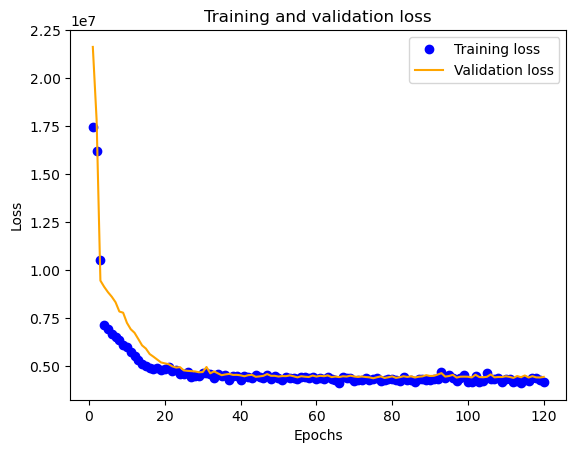

In [13]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

8/8 [==============================] - 0s 2ms/step


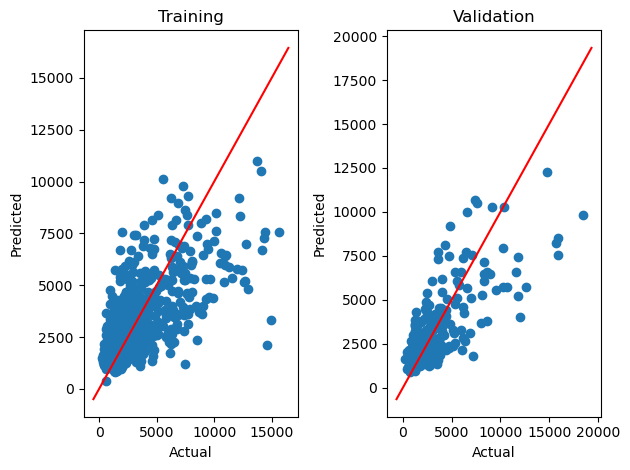

In [14]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

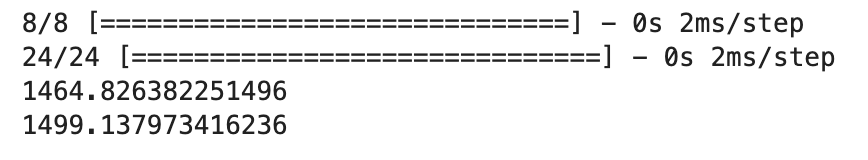

The performance is better when we add the drop out layers to the neural network.

In [15]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

24/24 [==============================] - 0s 2ms/step
1392.9856513003085
1457.6539149130545


In [19]:
from keras.utils import model_to_dot
from keras.utils import plot_model

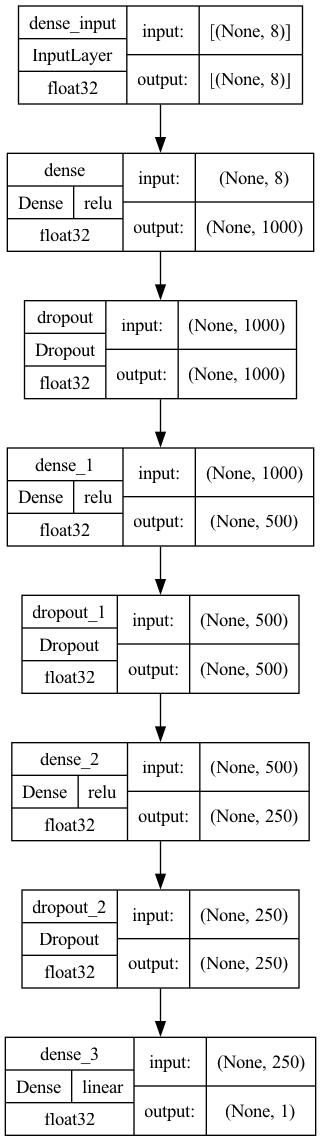

In [23]:
plot_model( 
    model, 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
) 

In [16]:
r2_score(y_test, pred)

0.5373124150402304